In [3]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the packages

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis on Uber Request data
Task 1: Data Cleaning

- ### Subtask 1.1: Import and read
-Load the Uber Request Data into a panda data frames and name it df.
-Correct the Request Timestamp and Drop Timestamp datatype.

In [4]:
# importing csv file
df=pd.read_csv("Uber Request Data.csv")

In [4]:
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
#Correcting the data types
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

-  ### Subtask 1.2: Understand the Dataset

    - How many unique pickup points are present in `df`?
    -  How many observations are present in `df`?
    - Number of null values?
    - Inspecting the null values

In [6]:
#How many unique pickup points are present in uberReq?
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [7]:
#How many observations are present in uberReq?
df.shape


(6745, 6)

In [8]:
#extracting date and time from request_Date_Time

df['request_Date'] = df['Request timestamp'].dt.date
df['request_Time'] = df['Request timestamp'].dt.time
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_Date,request_Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,2016-11-07,06:46:00


#### 1. What are the names and data types of the columns? 

In [8]:
df.dtypes


Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [9]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

#### 2.What are the basic summary statistics? 

In [10]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


#### 3.Are there any categorical variables and missing values? If so, print it. 

In [12]:
categorical_variables = df.select_dtypes(include=['object']).columns
categorical_variables

Index(['Pickup point', 'Status'], dtype='object')

In [13]:
#Inspecting the Null values , column-wise
missing_values = df.isnull().sum()
missing_variables = missing_values[missing_values > 0].index
print(missing_values,missing_variables)


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64 Index(['Driver id', 'Drop timestamp'], dtype='object')


In [14]:
df[df['Driver id'].isnull()]['Status'].value_counts()


No Cars Available    2650
Name: Status, dtype: int64

In [15]:
df[df['Drop timestamp'].isnull()]['Status'].value_counts()

No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

Inference on Column Null - Values

Driver id - 2650 Nulls
Drop timestamp - 3914 Nulls
The null values in Above mentioned columns are valid : - as the status value of these rows is being either the "No Cars available" or "cancelled" Hence they dont need to be imputed and these rows are carrying specific meaning with nulls values in those columns.

The Missing-type Identified : MNAR ( Missing Not At Random )

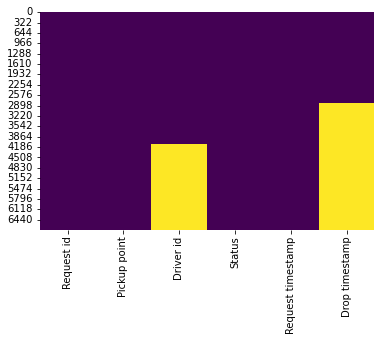

In [16]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [17]:
print(len(df['Request id'].unique()))
print(len(df['Pickup point'].unique()))
print(len(df['Status'].unique()))

6745
2
3


In [18]:
#Checking if there are any duplicate values
len(df[df.duplicated()].index)

0

## Task 2: Univariate Analysis

<AxesSubplot:xlabel='Status'>

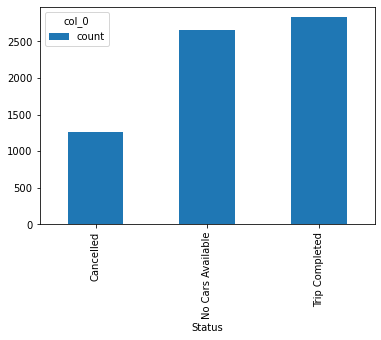

In [19]:
#Univariate analysis on Status column 
status = pd.crosstab(index = df["Status"], columns="count")     
status.plot.bar()

#### Univariate Analysis conclusion of Status column:

`No cars available` is more than the number of trips `cancelled`. 

<AxesSubplot:xlabel='Pickup point'>

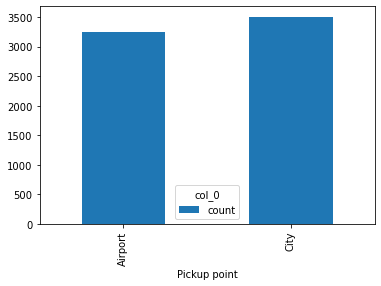

In [20]:
#Univariate analysis on Pickup Point column 
pick_point = pd.crosstab(index = df["Pickup point"], columns="count")     
pick_point.plot.bar()

#### Univariate Analysis conclusion of Pickup point column:

The pickup points `Airport` and `City` are almost equal times present in the dataset.

## Task 3: Bivariate Analysis

In [21]:
#grouping by Status and Pickup point.
df.groupby(['Status', 'Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

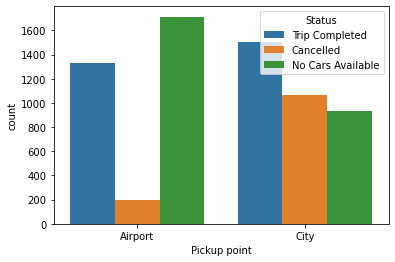

In [22]:
# Visualizing the count of Status and Pickup point bivariate analysis
sns.countplot(x=df['Pickup point'],hue =df['Status'] ,data = df)

#### Bivariate Analysis conclusion of Status and Pickup point columns:

- There are more `No cars available` from `Airport` to `City`.
- There are more cars `Cancelled` from `City` to `Airport`.

## Task 4: Graphical Analysis

#### 9.Are there any time-based trends or patterns?

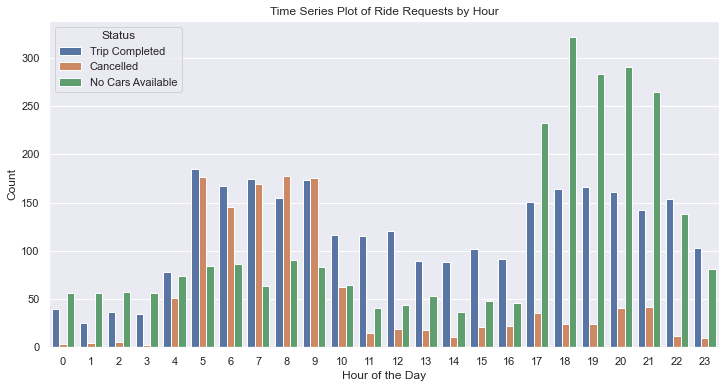

In [36]:
# Extract hour and day information from the 'Request timestamp'
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day

# Time series plot for ride requests
plt.figure(figsize=(12, 6))
sns.countplot(x='Request Hour', data=df, hue='Status')
plt.title('Time Series Plot of Ride Requests by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


#### 10)Are there any correlations between variables? Calculate  correlations.

In [37]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

              Request id  Driver id      hour      Hour  Request Hour  \
Request id      1.000000  -0.011499  0.189972  0.189972      0.189972   
Driver id      -0.011499   1.000000 -0.006737 -0.006737     -0.006737   
hour            0.189972  -0.006737  1.000000  1.000000      1.000000   
Hour            0.189972  -0.006737  1.000000  1.000000      1.000000   
Request Hour    0.189972  -0.006737  1.000000  1.000000      1.000000   
Request Day     0.913761  -0.012508 -0.006833 -0.006833     -0.006833   

              Request Day  
Request id       0.913761  
Driver id       -0.012508  
hour            -0.006833  
Hour            -0.006833  
Request Hour    -0.006833  
Request Day      1.000000  


#### 11)What is total request from airport and city ?

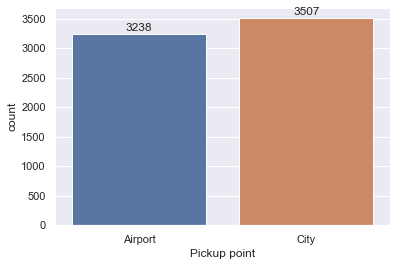

In [23]:
#looking for insight in pickup point
sns.set(style="darkgrid")
ax = sns.countplot(x="Pickup point", data=df)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, value, ha="center")
plt.show()

#There isn't much difference in airport and city requests.

#### Q12)What is the distribution of trip statuses (completed, canceled, no cars available), and how does it differ during peak and off-peak hours?


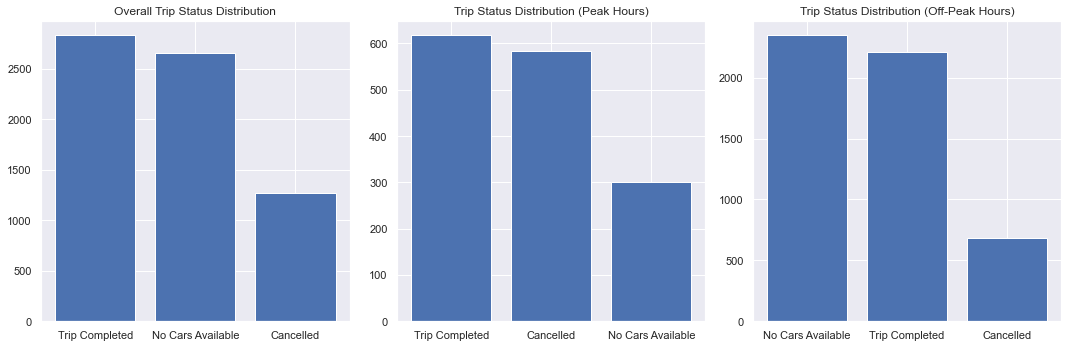

In [24]:
#df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
#df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])


peak_start = 7  # 7 AM
peak_end = 10   # 10 AM


df['hour'] = df['Request timestamp'].dt.hour

def categorize_peak_hour(hour):
    if peak_start <= hour <= peak_end:
        return 'Peak'
    else:
        return 'Off-Peak'

df['hour_category'] = df['hour'].apply(categorize_peak_hour)

status_distribution = df['Status'].value_counts()


peak_status_distribution = df[df['hour_category'] == 'Peak']['Status'].value_counts()

off_peak_status_distribution = df[df['hour_category'] == 'Off-Peak']['Status'].value_counts()


plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(status_distribution.index, status_distribution.values)
plt.title('Overall Trip Status Distribution')

plt.subplot(132)
plt.bar(peak_status_distribution.index, peak_status_distribution.values)
plt.title('Trip Status Distribution (Peak Hours)')

plt.subplot(133)
plt.bar(off_peak_status_distribution.index, off_peak_status_distribution.values)
plt.title('Trip Status Distribution (Off-Peak Hours)')

plt.tight_layout()
plt.show()

#### Q13)Can we identify patterns in the pick-up and drop-off locations for airport trips? Are there specific hotspots or trends?

In [25]:
airport_trips = df[df['Pickup point'].isin(['Airport', 'Airport B']) | df['Drop timestamp'].notna()]

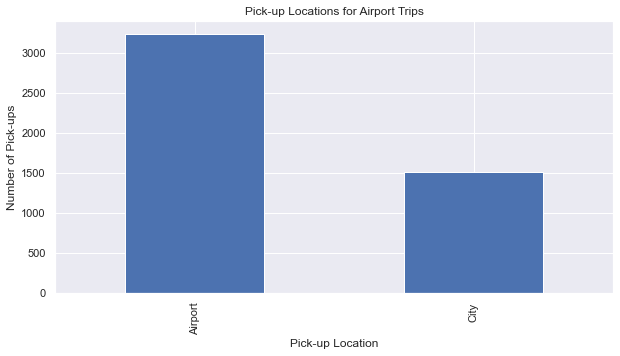

In [26]:
airport_trips['Pickup point'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Pick-up Location')
plt.ylabel('Number of Pick-ups')
plt.title('Pick-up Locations for Airport Trips')
plt.show()

#### Q14)How does the availability of drivers (supply) change throughout the day and week? Are there periods of high driver availability or shortages?

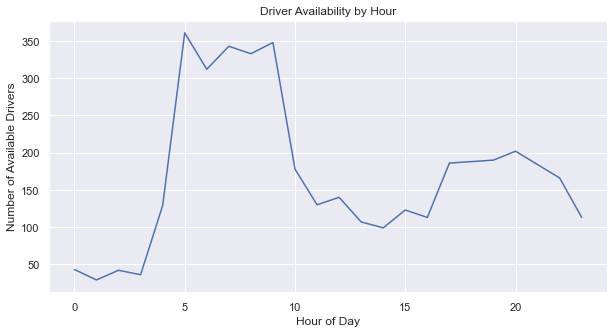

In [27]:
df.groupby('hour')['Driver id'].count().plot(kind='line', figsize=(10, 5))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Available Drivers')
plt.title('Driver Availability by Hour')
plt.show()

#### Q15)Are there any correlations between the time of day, day of the week, or weather conditions and the number of completed trips?

In [28]:
df['Hour'] = df['Request timestamp'].dt.hour
df['Day of Week'] = df['Request timestamp'].dt.day_name()

In [29]:
hourly_completed_trips = df[df['Status'] == 'Completed'].groupby('Hour')['Request id'].count()
daily_completed_trips = df[df['Status'] == 'Completed'].groupby('Day of Week')['Request id'].count()

In [30]:
hour_correlation = hourly_completed_trips.corr(df.groupby('Hour')['Request id'].count())
day_of_week_correlation = daily_completed_trips.corr(df.groupby('Day of Week')['Request id'].count())
print(f'Correlation between Hour and Completed Trips: {hour_correlation}')
print(f'Correlation between Day of Week and Completed Trips: {day_of_week_correlation}')

Correlation between Hour and Completed Trips: nan
Correlation between Day of Week and Completed Trips: nan


#### 16) Show the timing where was the high request rates in morning and evening?


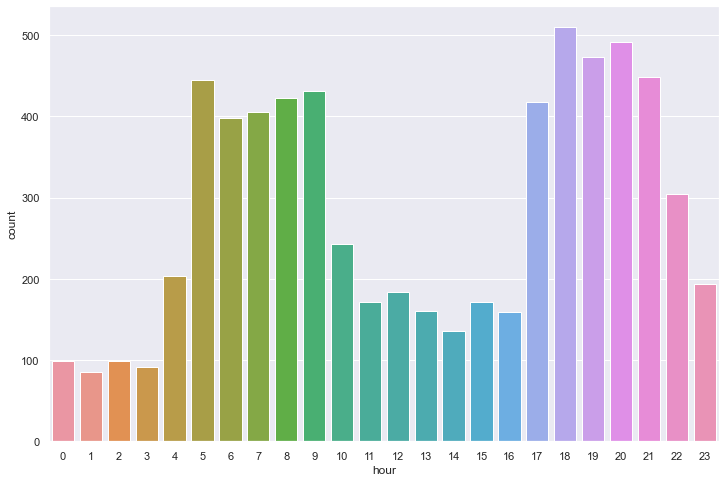

In [31]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='hour', data=df)
plt.show()

#The below plot clearly depicts that there are high request rates from 5am to 9am and 5pm to 10 pm

#### 17)find the total percentage of trip completed ,cancelled and no cars available in airport and city together?
#### 5)Is the data balanced or imbalanced? Visualize.


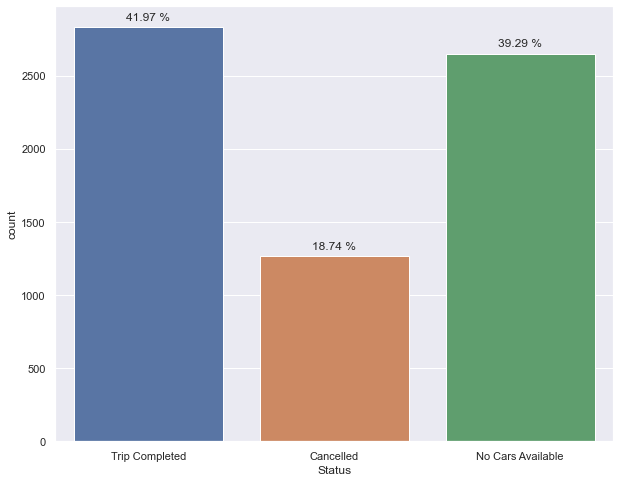

In [32]:
#looking for insight in status
plt.figure(figsize=(10, 8))
ax =sns.countplot(x="Status", data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()


#Only 41.97% requests from city and airport request gets completed 

#### 18)find the total percentage of trip completed ,cancelled and no cars available in airport and city each?


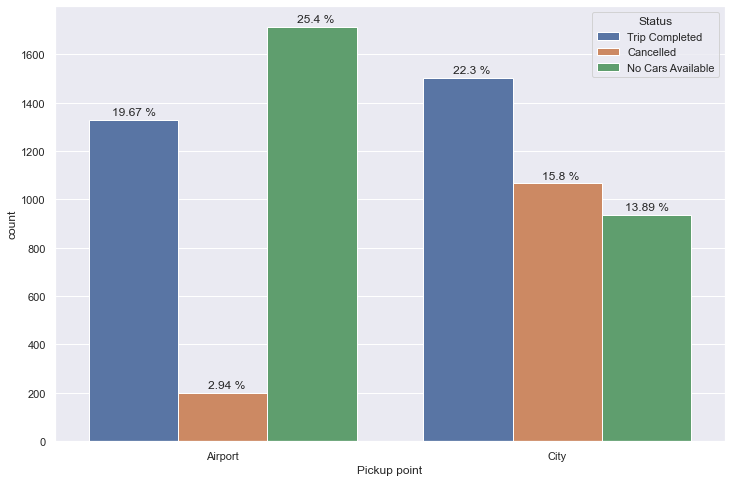

In [33]:
# Segmenting the data:

#segmenting pickup point over status
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Pickup point', hue="Status", data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

#The above plot shows that for most of the  Airport pickup requests there are no cars available 
#and most requests that get cancelled are from city pickup requests

#### 19)Are there any noticeable differences in demand and supply gaps on weekdays ?


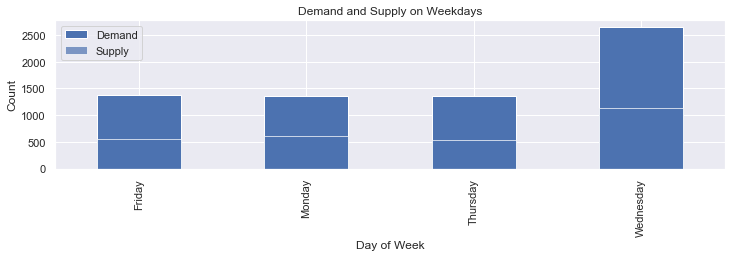

In [34]:
df['Day of Week'] = df['Request timestamp'].dt.day_name()


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

demand_weekdays = df[df['Day of Week'].isin(weekdays)].groupby('Day of Week').size()
supply_weekdays = df[(df['Status'] == 'Trip Completed') & (df['Day of Week'].isin(weekdays))].groupby('Day of Week').size()

demand_weekends = df[df['Day of Week'].isin(weekends)].groupby('Day of Week').size()
supply_weekends = df[(df['Status'] == 'Trip Completed') & (df['Day of Week'].isin(weekends))].groupby('Day of Week').size()

plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
demand_weekdays.plot(kind='bar', label='Demand')
supply_weekdays.plot(kind='bar', label='Supply', alpha=0.7)
plt.title('Demand and Supply on Weekdays')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend()

#### 20)Check if high request rates from 5am to 9 am and 5pm to 10 pm is consistent throughout all days?


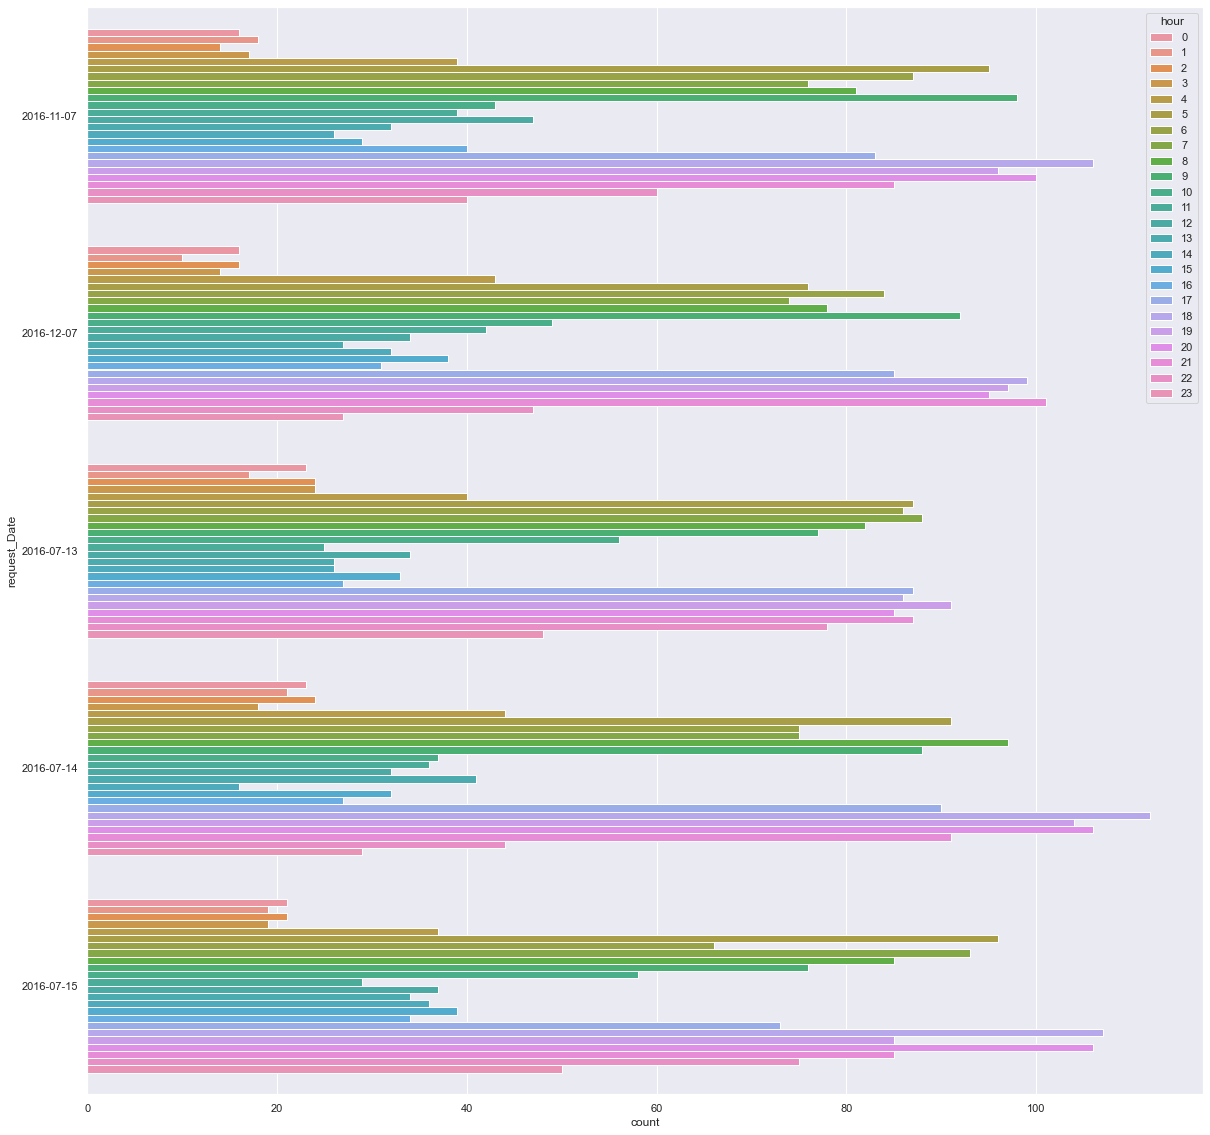

In [35]:
#to check if high request rates from 5am to 9am and 5pm to 10 pm is consistent throughout all days
df['request_Date'] = df['Request timestamp'].dt.date
plt.figure(num=None, figsize=(20, 20), facecolor='w', edgecolor='b')
sns.countplot(y='request_Date',hue="hour", data=df)
plt.show()

#shows that all dates high request rates is around the same time -5am to 9am and 5pm to 10 pm

### Hypothesis :

#### Pickup Point - City :

As per the analysis, the morning time slot is most problematic where the requests are being cancelled. Most probably the requests are being cancelled by the drivers due to the morning rush as it being the office hours and seeing the destination as airport which would be too far, the driver would think to earn more for the shorter trips within the city.

#### Pickup Point - Airport :

Upon analysis, the evening time slot seems to be most problematic for pickup points as airport where the requests being No Cars Available. The reason seems to be that not enough cars are available to service the requests as cars might not be available at the airport due to the cars serving inside the city.

### Conclusions :

- Based on the data analysis performed, following recommendation can be used by Uber to bridge the gap between supply and demand: -

    - For bridging the demand supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times and the incomplete requests can come down significantly.
    - Uber can provide some incentives to the driver who complete the trip from city to airport in the morning part. This might result the driver to not cancel the request from city to airport trips.
    - Last but sure solution to bring down the gap is to increase the numbers of cab in its fleet.